# US Flight Delay and Cancellation Trends in 2019
## by Dagmara Namasivayam

## Investigation Overview

In this project, I wanted to investigate arrival delays and cancellations. In particular, I begin by looking at both, then focus only on characteristics of cancelled flights, such as location and timing.

## Dataset Overview

This analysis includes almost 7.5 million flights in the US throughout the whole year of 2019. The datasest includes flight details such as time, origin/destination airports, carriers, and delay times/cancellations along with their causes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flights2019 = pd.read_csv("flights2019_cleaned.csv")

## Distribution of Arrival Delay Times and Cancellations

The flight arrival delays have a very large range, from about 1.5 hours *early* to almost 2 full *days* delayed. The delays take on a unimodal distribution centered around -10, or 10 minutes *early*. To see the main data better, the first plot shows only the top 95% of delays. The second plot shows the complete distribution, but binned into 4 categories including cancellations. Less than 2% of flights, or 139,000 were cancelled in 2019.

The remainder of the presentation will focus on only the cancelled flights.

In [ ]:
# Filter to only top 95% of the data to visualize better:
flights2019_top95 = flights2019[flights2019.ARR_DELAY < flights2019.ARR_DELAY.quantile(.95)]

binsize = 1
bins = np.arange(flights2019_top95.ARR_DELAY.min(), flights2019_top95.ARR_DELAY.max()+binsize, binsize)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = flights2019_top95, x = 'ARR_DELAY', bins = bins)
plt.xlabel('Arrival Delay (min)'.title(),fontsize=10,weight='bold')
plt.ylabel('Count'.title(),fontsize=10,weight='bold')
plt.title('Distribution of Arrival Delay Times (Top 95%)'.title(),fontsize=14,weight='bold')
plt.show()

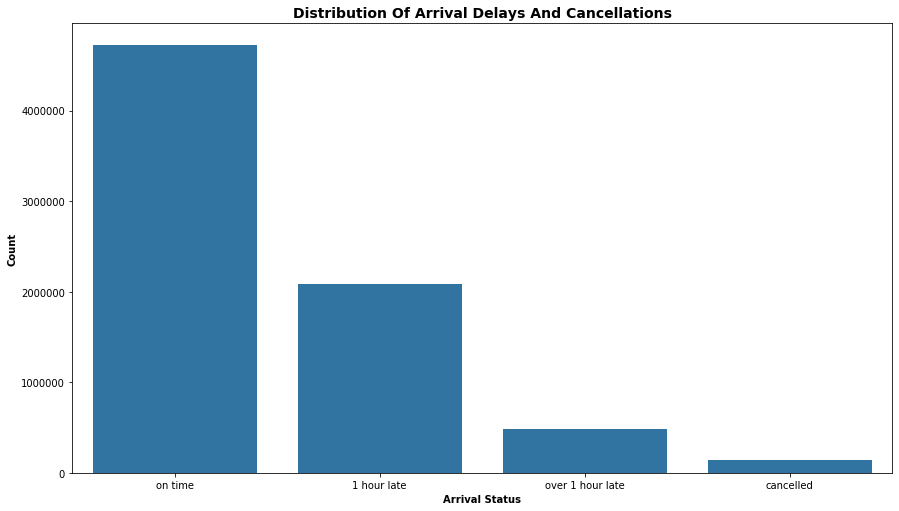

In [5]:
plt.figure(figsize=[14.70, 8.27])
default_color = sb.color_palette()[0]

delay_bin_order = flights2019.DELAY_BIN.value_counts().index

g = sb.countplot(data = flights2019, x = 'DELAY_BIN', color = default_color, order = delay_bin_order);

plt.xlabel('Arrival Status'.title(),fontsize=10,weight='bold');
plt.ylabel('Count'.title(),fontsize=10,weight='bold')
# plt.xticks(rotation=45);
plt.title('Distribution of Arrival Delays and Cancellations'.title(),fontsize=14,weight='bold');

## Distribution of Cancellation Causes

For the 2% of flights that were cancelled in 2019, the plot below shows the distribution of the 4 causes of cancellations, by percent of cancelled flights. Weather is by far the most common cause, at just over half. Carrier cancellations, which include circumstances within an airline's control, were the next most common cause, followed closely by National Air System (NAS) cancellations. NAS includes circumstances such as non-extreme weather, airport operations, heavy traffic, and air traffic control. Lastly, security cancellations were very rare (0.01%, or just 15 by count).

In [3]:
cancel_dict = {'A': 'carrier', 'B': 'weather', 'C': 'NAS', 'D': 'security'}

n_points = flights2019[flights2019.CANCELLED==1].shape[0]
max_count = flights2019.CANCELLATION_CODE.value_counts().max()
max_prop = max_count / n_points

tick_props = np.arange(0, max_prop, .1)
# tick_names = ['{:0.1f}'.format(v) for v in tick_props]
tick_names = ['{:0.1f}'.format(v) for v in tick_props*100]

cancel_order = flights2019.CANCELLATION_CODE.value_counts().index
cancel_x_labels = [] #create an empty list to store the labels
for key in cancel_order:      
    cancel_x_labels.append(cancel_dict[key]) #store each label in the correct order

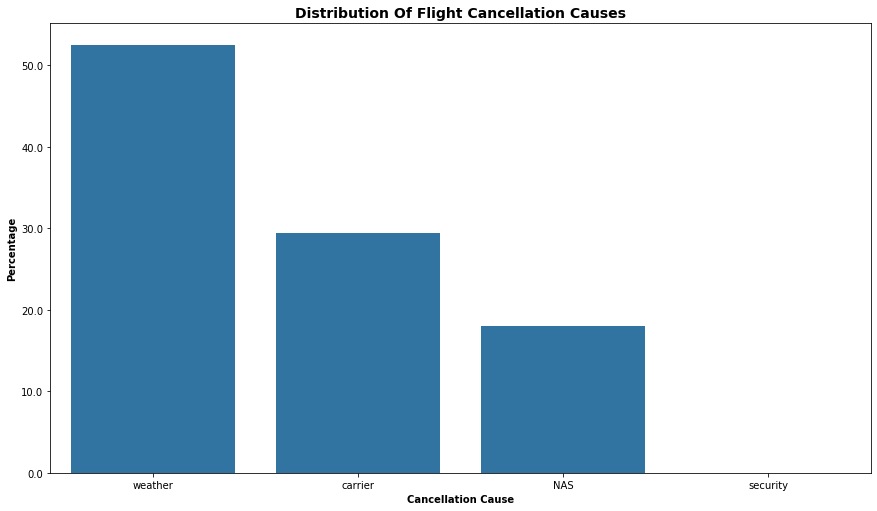

In [6]:
plt.figure(figsize=[14.70, 8.27])
g = sb.countplot(data = flights2019, x = 'CANCELLATION_CODE', color = default_color, order = cancel_order);

plt.xlabel('Cancellation Cause'.title(),fontsize=10,weight='bold');
g.set(xticklabels=cancel_x_labels);
plt.title('Distribution of Flight Cancellation Causes'.title(),fontsize=14,weight='bold');

plt.yticks(tick_props*n_points, tick_names);
plt.ylabel('Percentage'.title(),fontsize=10,weight='bold');

## Cancellation Cause vs. Season

Weather was the most common cause of delay in 2019 winter, summer, and fall flights. However, cancellations due to the carrier were slightly more common than those due to weather in the spring. Weather-related cancellations accounted for the majority of cancellations in the winter, as may be expected due to the prevalence of snowstorms.

Since there were an unequal number of flights in each season, the distribution of causes is plotted as percentage within each season.

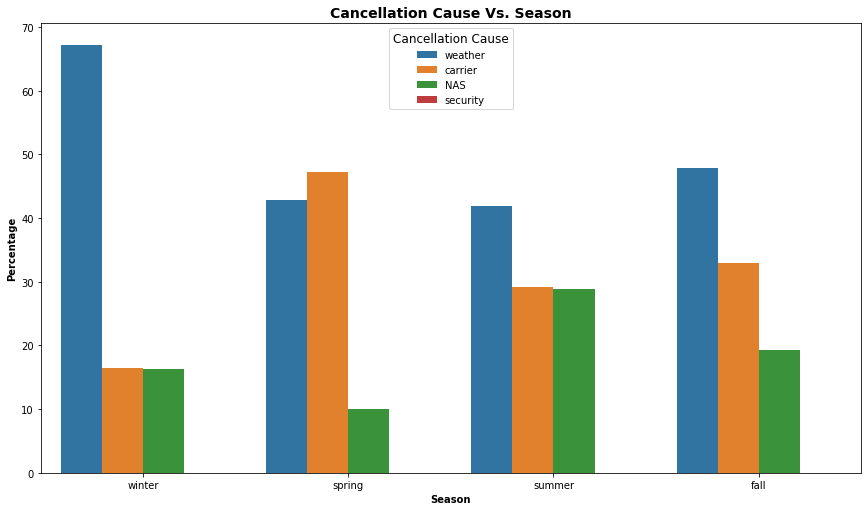

In [7]:
# Make a data subset for only the cancelled flights
flights2019_cancelled = flights2019[flights2019.CANCELLED==1]

flights2019_cancelled['CANCELLATION_CODE'] = flights2019_cancelled['CANCELLATION_CODE'].replace(['A','B','C','D'], ['carrier','weather','NAS','security'])

counts = (flights2019_cancelled.groupby(['SEASON'])['CANCELLATION_CODE']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('SEASON'))
cancel_order = flights2019_cancelled.CANCELLATION_CODE.value_counts().index

plt.figure(figsize=[14.70, 8.27])
p = sb.barplot(x="SEASON", y="percentage", hue="CANCELLATION_CODE", data=counts, order = ['winter','spring','summer','fall'], hue_order = cancel_order)
plt.xlabel('Season'.title(),fontsize=10,weight='bold');
plt.ylabel('Percentage'.title(),fontsize=10,weight='bold')
plt.title('Cancellation Cause vs. Season'.title(),fontsize=14,weight='bold')
# leg = p.axes.get_legend()
# leg.set_title('Cancellation Cause')
plt.legend(loc='top right', title="Cancellation Cause", title_fontsize=12);

## Cancellation Cause vs. Season by Airport

The 6 busiest airports (by number of incoming flights) in 2019 were as follows:

ATL (Hartsfield-Jackson Atlanta International Airport) - Atlanta, GA <br />
ORD (Chicago O'Hare International Airport) - Chicago, IL <br />
DFW (Dallas/Fort Worth International Airport) - Dallas, TX <br />
DEN (Denver International Airport) - Denver, CO <br />
CLT (Charlotte Douglas International Airport) - Charlotte, NC <br />
LAX (Los Angeles International Airport) - Los Angeles, CA <br />

The effect of these airports was added to the analysis on the last slide. At ORD, DFW, and DEN, weather was the leading cause of cancellation for all seasons. Additionally, the only times that cancellations due to NAS were more common than carrier cancellations were at ORD in summer and winter, as well as DFW in the fall.

Contrary to what we may expect, winter weather cancellations are prevalent not only in airports located in colder-climate cities. One explanation could be that weather in one part of the country affects flights to many other cities. Once again, LAX seems to be an outlier, as weather was not the most common cause of cancellation during any season at that airport.

In [ ]:
# Since the airports are encoded based on id number, make a dictionary to airport codes, which more people understand
airport_dict = {10397: 'ATL', 13930: 'ORD', 11298: 'DFW', 11292: 'DEN', 11057: 'CLT', 12892: 'LAX'}
top_airports = list(airport_dict.keys())
flights2019_top_airports = flights2019[flights2019.DEST_AIRPORT_ID.isin(top_airports)]
airport_order = flights2019_top_airports.DEST_AIRPORT_ID.value_counts().index.to_list()

flights2019_top_airports_cancelled = flights2019[(flights2019.DEST_AIRPORT_ID.isin(top_airports)) & (flights2019.CANCELLED==1)] # Redo for cancelled flights
flights2019_top_airports_cancelled['CANCELLATION_CODE'] = flights2019_top_airports_cancelled['CANCELLATION_CODE'].replace(['A','B','C','D'], ['carrier','weather','NAS','security'])


counts = (flights2019_top_airports_cancelled.groupby(['DEST_AIRPORT_ID','SEASON'])['CANCELLATION_CODE']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(['DEST_AIRPORT_ID','SEASON']))

In [ ]:
g = sb.FacetGrid(counts, col='DEST_AIRPORT_ID', col_wrap=3, col_order = airport_order, height=8.27/2, aspect=(14.70/3)/(8.27/2));
g.map(sb.barplot,'SEASON','percentage','CANCELLATION_CODE', order = ['winter','spring','summer','fall'], hue_order=cancel_order, palette="deep").add_legend();
axes = g.axes.flatten();
axes[0].set_title("ATL",fontsize=12,weight='bold');
axes[1].set_title("ORD",fontsize=12,weight='bold');
axes[2].set_title("DFW",fontsize=12,weight='bold');
axes[3].set_title("DEN",fontsize=12,weight='bold');
axes[4].set_title("CLT",fontsize=12,weight='bold');
axes[5].set_title("LAX",fontsize=12,weight='bold');

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Cancellation Cause for Busiest Airports'.title(),fontsize=14,weight='bold');
axes[3].set_xlabel("season".title(),fontsize=10,weight='bold');
axes[4].set_xlabel("season".title(),fontsize=10,weight='bold');
axes[5].set_xlabel("season".title(),fontsize=10,weight='bold');

axes[0].set_ylabel("Percentage".title(),fontsize=10,weight='bold');
axes[3].set_ylabel("Percentage".title(),fontsize=10,weight='bold');

In [ ]:
!jupyter nbconvert slide_deck_flights.ipynb --to slides --post serve --template output_toggle